## Assignment 10

Author: Anjani Bonda<br>
Date: 5/20/2023<br>

### Assignment 10.1

In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

#### Assignment 10.1.a
Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.

```
def tokenize(sentence):
    tokens = []
    # tokenize the sentence
    return tokens
```

In [1]:
import string

def tokenize(sentence):
    # standardize text to lowercase
    sentence = sentence.lower()
    # remove any punctuation
    sentence = "".join(char for char in sentence if char not in string.punctuation)   
    # split words into tokens
    return sentence.split()

In [2]:
sentence = "Hello Everyone! Welcome to Bellevue University - DSC650 program"
sentence

'Hello Everyone! Welcome to Bellevue University - DSC650 program'

In [3]:
tokenized_text = tokenize(sentence)
tokenized_text

['hello',
 'everyone',
 'welcome',
 'to',
 'bellevue',
 'university',
 'dsc650',
 'program']

#### Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 

```
def ngram(tokens, n):
    ngrams = []
    # Create ngrams
    return ngrams
```

In [4]:
def ngram(tokens, n):
    # zipping tokens into ngrams
    temp = zip(*[tokens[x:] for x in range(0, n)])
    
    # join the ngrams
    return [" ".join(ngram) for ngram in temp]

In [5]:
# Assign words/ngrams into a list where n=1 and print
unigram = ngram(tokenized_text, 1)
unigram

['hello',
 'everyone',
 'welcome',
 'to',
 'bellevue',
 'university',
 'dsc650',
 'program']

In [6]:
# Assign ngrams in triplets into a list where n=3 and print
trigram = ngram(tokenized_text, 3)
trigram

['hello everyone welcome',
 'everyone welcome to',
 'welcome to bellevue',
 'to bellevue university',
 'bellevue university dsc650',
 'university dsc650 program']

#### Assignment 10.1.c

In [25]:
# Import required library/libraries
import numpy as np

In [26]:
# Function - one_hot_encode to create a vector from a numerical vector from a list of tokens
def one_hot_encode(tokens, num_words):
    # build index of the tokens
    token_index = {}
    for word in tokens:
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
    # vectorize tokens
    max_length = 10
    # create vector of zeros
    results = np.zeros(shape=(max_length,max(token_index.values()) + 1))
    # One_hot_encode the words to the vector - results
    for x, word in list(enumerate(tokens))[:max_length]:
        index = token_index.get(word)
        results[x, index] = 1
    return results

In [27]:
one_hot_text = one_hot_encode(tokenized_text, 100)
one_hot_text

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Assignment 10.2

Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [28]:
## Import required library/libraries.
import os

In [29]:
# Read and process labels of the IMDB dataset
imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [30]:
# Tokenize text and prepare a train and test samples split
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
import numpy as np

maxlen = 100 
train_samples = 200 
test_samples = 10000
max_words = 10000 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices]
labels = labels[indices]

x_train = data[:train_samples]
y_train = labels[:train_samples]
x_test = data[train_samples: train_samples + test_samples]
y_test = labels[train_samples: train_samples + test_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [35]:
# Training the model -  without word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Compile and fit the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
validation_data=(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                320032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 3s 326ms/step - loss: 0.6905 - acc: 0.5400 - val_loss: 0.6932 - val_acc: 0.5055
Epoch 2/10
7/7 [==============================

Evaluate the model on test data

In [36]:
# Tokenize the data of test set
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Plot the model's performance over time:

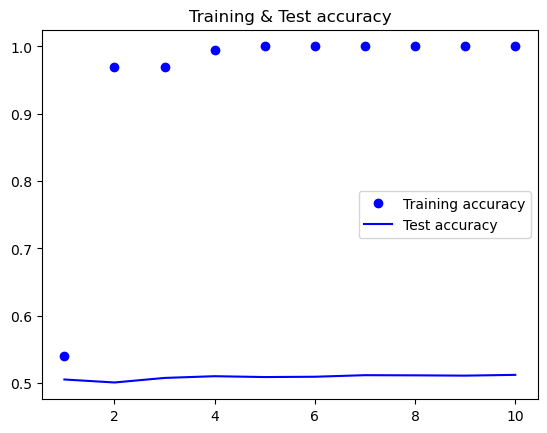

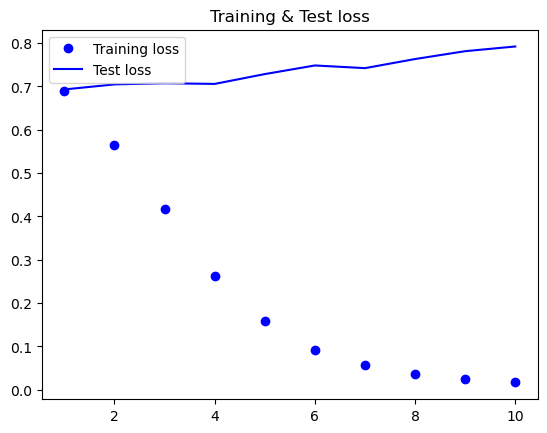

In [38]:
# Plotting the results with matplotlib
import matplotlib.pyplot as plt

accu = history.history['acc']
test_accu = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, accu, 'bo', label='Training accuracy')
plt.plot(epochs, test_accu, 'b', label='Test accuracy')
plt.title('Training & Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training & Test loss')
plt.legend()
plt.show()

Evaluate the model

In [39]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 2s 3ms/step - loss: 0.7923 - acc: 0.5124
Model Loss:     0.792
Model Accuracy: 51.2%


#### Assignment 10.3

Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [40]:
# LSTM layer in Keras
from keras.layers import LSTM

max_features = 10000 

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10


2023-05-21 15:47:44.103271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-21 15:47:44.105712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-21 15:47:44.107358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - ETA: 0s - loss: 0.6930 - acc: 0.5312

2023-05-21 15:47:47.539094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-21 15:47:47.541973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-21 15:47:47.543692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 4s 831ms/step - loss: 0.6930 - acc: 0.5312 - val_loss: 0.6904 - val_acc: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 155ms/step - loss: 0.6890 - acc: 0.5688 - val_loss: 0.6868 - val_acc: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 163ms/step - loss: 0.6853 - acc: 0.5750 - val_loss: 0.6859 - val_acc: 0.6000
Epoch 4/10
2/2 [==============================] - 0s 210ms/step - loss: 0.6828 - acc: 0.5750 - val_loss: 0.6842 - val_acc: 0.6000
Epoch 5/10
2/2 [==============================] - 0s 152ms/step - loss: 0.6798 - acc: 0.5750 - val_loss: 0.6832 - val_acc: 0.6000
Epoch 6/10
2/2 [==============================] - 0s 203ms/step - loss: 0.6765 - acc: 0.5750 - val_loss: 0.6800 - val_acc: 0.6000
Epoch 7/10
2/2 [==============================] - 0s 162ms/step - loss: 0.6717 - acc: 0.5750 - val_loss: 0.6790 - val_acc: 0.6000
Epoch 8/10
2/2 [==============================] - 0s 156ms/step - loss: 0.6688 - acc: 0.5750 - val_lo

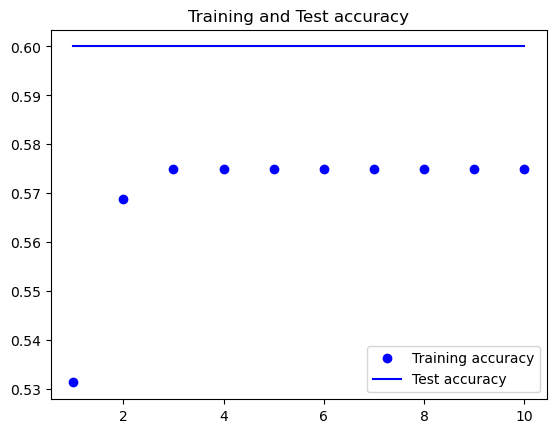

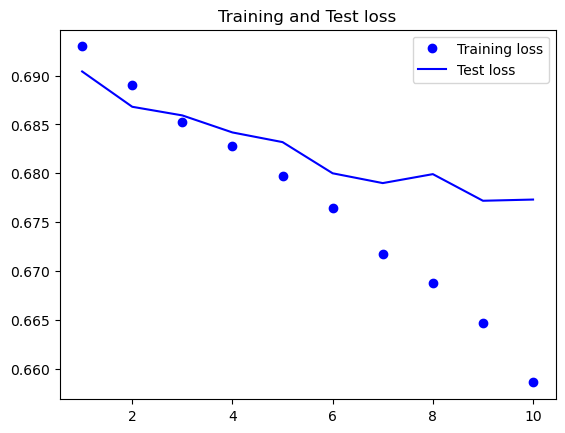

In [41]:
# Plot the results
import matplotlib.pyplot as plt

accu = history.history['acc']
test_accu = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, accu, 'bo', label='Training accuracy')
plt.plot(epochs, test_accu, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show()

In [42]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 19s 25ms/step - loss: 0.6956 - acc: 0.5000
Model Loss:     0.696
Model Accuracy: 50.0%


#### Assignment 10.4

Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [43]:
# Train and evaluate a simple 1D convnet on  IMDB dataset
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

max_len = 100 # to match dimensions
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 94, 32)            28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                

Epoch 1/10
2/2 [==============================] - 1s 288ms/step - loss: 1.5926 - acc: 0.4250 - val_loss: 0.8142 - val_acc: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 65ms/step - loss: 0.6565 - acc: 0.4375 - val_loss: 0.7437 - val_acc: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 68ms/step - loss: 0.5502 - acc: 0.9062 - val_loss: 0.7011 - val_acc: 0.3500
Epoch 4/10
2/2 [==============================] - 0s 80ms/step - loss: 0.4814 - acc: 1.0000 - val_loss: 0.6964 - val_acc: 0.4000
Epoch 5/10
2/2 [==============================] - 0s 57ms/step - loss: 0.4356 - acc: 1.0000 - val_loss: 0.6833 - val_acc: 0.6750
Epoch 6/10
2/2 [==============================] - 0s 55ms/step - loss: 0.3946 - acc: 1.0000 - val_loss: 0.6818 - val_acc: 0.6750
Epoch 7/10
2/2 [==============================] - 0s 67ms/step - loss: 0.3575 - acc: 1.0000 - val_loss: 0.6704 - val_acc: 0.6250
Epoch 8/10
2/2 [==============================] - 0s 62ms/step - loss: 0.3207 - acc: 1.0000 - va

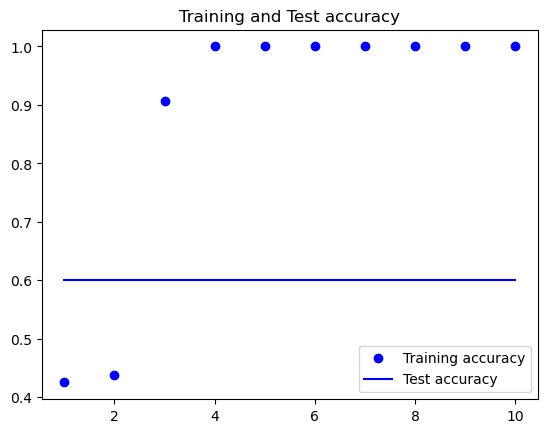

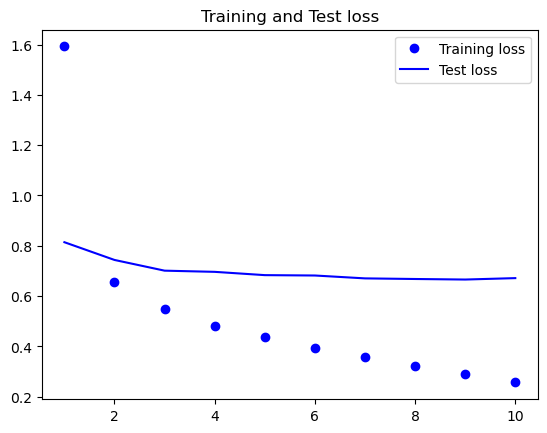

In [44]:
# Plot the results
import matplotlib.pyplot as plt

accu = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, accu, 'bo', label='Training accuracy')
plt.plot(epochs, test_accu, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()

In [45]:
# Evaluate model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 3s 4ms/step - loss: 0.6923 - acc: 0.5140
Model Loss:     0.692
Model Accuracy: 51.4%
